## Mobile_Dataset_Project

In [1]:
print('testing123')

testing123


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.shape

(2000, 21)

In [6]:
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]

print(X.head(), '\n', y.head())


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  
0        0 

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=43,stratify=y)

In [8]:
categorical_features = []
numerical_features = []

for column in X.columns:
    #print(df[column].value_counts())
    if len(X[column].value_counts()) <= 2:
        categorical_features.append(column)
        continue
        #pass
    numerical_features.append(column)

print(categorical_features)
#print(numerical_features)

X_cat_train = X_train.drop(columns=numerical_features)
X_cat_test = X_test.drop(columns=numerical_features)

print(X_cat_train.shape)
print(y_train.shape)
print(X_cat_train.columns)

['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
(1500, 6)
(1500,)
Index(['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi'], dtype='object')


In [9]:
from sklearn.preprocessing import StandardScaler

def Preprocess(X_train=None,X_test=None):
    
    X_num_train = X_train.drop(columns=categorical_features)
    X_num_test  = X_test.drop(columns=categorical_features)

    #print(X_num_train.columns)
    std_scaler = StandardScaler()
    X_num_train = std_scaler.fit_transform(X_num_train)
    X_num_test = std_scaler.transform(X_num_test)

    X_num_train = pd.DataFrame(X_num_train,columns=numerical_features)
    X_num_test = pd.DataFrame(X_num_test,columns=numerical_features) 

    print(type(X_num_train),type(X_num_test))
    print(X_num_train.shape)

    X_num_train.reset_index(drop=True, inplace=True)
    X_cat_train.reset_index(drop=True, inplace=True)
    X_num_test.reset_index(drop=True, inplace=True)
    X_cat_test.reset_index(drop=True, inplace=True)

    #combine back with categorical features
    X_train = pd.concat([X_num_train, X_cat_train], axis=1)
    X_test = pd.concat([X_num_test, X_cat_test], axis=1)
    print(X_train.shape)
    print(X_train.columns)

    return X_train,X_test

In [10]:
X_train,X_test = Preprocess(X_train=X_train,X_test=X_test)
X_train.head()


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
(1500, 14)
(1500, 20)
Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'blue', 'dual_sim', 'four_g', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,-0.749328,-0.141912,-0.295393,0.543604,-1.005820,0.321954,-1.556730,1.008001,-1.065401,-1.705147,-1.427147,-0.317671,0.747169,-0.913920,0,1,0,1,0,0
1,0.402499,0.831200,-0.995008,0.927945,0.028974,-1.098682,-0.236970,-1.474216,-1.158237,-0.827174,0.147310,0.157885,-1.345525,0.179140,1,1,1,1,1,0
2,1.713354,1.439396,0.171017,1.751533,1.408699,0.151478,-1.116810,0.511557,0.943035,0.184806,-0.366742,-1.744339,-0.647960,-0.549566,1,0,1,1,1,0
3,-1.371814,0.831200,-0.995008,0.927945,-1.350751,-0.018999,1.522709,-1.474216,-0.254781,-0.545298,1.319385,-0.317671,-1.113003,0.907847,1,0,1,1,1,1
4,-0.160919,0.587922,-0.295393,-0.389795,1.063768,1.657351,0.202950,-0.977773,-1.319003,-0.097070,0.330043,0.157885,-0.182917,0.725671,0,0,1,1,0,0


In [11]:
print(X_train.shape)
print(X_test.shape)

print(X_test.shape)
print(y_test.shape)

(1500, 20)
(500, 20)
(500, 20)
(500,)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import tensorflow as tf
import keras
from keras import layers

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

results = {}

def result(model,y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    cr = classification_report(y_test,y_pred)
    cm = confusion_matrix(y_test,y_pred)

    acc_score = {model:acc}
    results.update(acc_score)
    print('Accuracy_Score  =',acc,'\n',cr,'\n',cm)

def Model(model = None):
    if model == 'knn':
        clf = KNeighborsClassifier(n_neighbors=4,n_jobs=-1).fit(X_train,y_train)
        y_pred = clf.predict(X_test)

        result(model,y_test,y_pred)

    elif model == 'lr':
        clf = LogisticRegression(random_state=43,solver='newton-cg',multi_class='multinomial',n_jobs=-1).fit(X_train,y_train)
        y_pred = clf.predict(X_test)

        result(model,y_test,y_pred)

    elif model == 'svm':
        clf = SVC(random_state=43).fit(X_train,y_train)
        y_pred = clf.predict(X_test)

        result(model,y_test,y_pred)

    elif model == 'nn':
        X_train_nn,X_valid,y_train_nn,y_valid = train_test_split(X_train,y_train,random_state=43,stratify=y_train,test_size=0.25)
        print(y_train_nn.shape,y_valid.shape)

        input_shape = (X.shape[1],)
        clf = keras.Sequential()

        clf.add(layers.Dense(32,activation='relu', name='layer_1', input_shape=input_shape))
        clf.add(layers.Dense(64,activation='relu',name='layer_2'))
        clf.add(layers.Dense(64,activation='relu',name='layer_3'))
        clf.add(layers.Dense(32,activation='relu',name='layer_4'))
        clf.add(layers.Dense(4,activation='softmax',name='output_layer'))

        clf.summary()

        clf.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])
        
        clf.fit(x=X_train_nn,
                y=y_train_nn,
                batch_size=16,
                epochs=30,
                validation_data=(X_valid,y_valid)
                )

        y_pred = np.argmax(clf.predict(X_test),axis=1)
        #print(y_pred)
        result(model,y_test,y_pred)

    else: 
        return 'No Model Found!'

## Base Model

In [13]:
Model(model='knn')

Accuracy_Score  = 0.592 
               precision    recall  f1-score   support

           0       0.71      0.85      0.77       125
           1       0.50      0.44      0.47       125
           2       0.42      0.50      0.46       125
           3       0.77      0.58      0.66       125

    accuracy                           0.59       500
   macro avg       0.60      0.59      0.59       500
weighted avg       0.60      0.59      0.59       500
 
 [[106  17   2   0]
 [ 35  55  35   0]
 [  7  34  63  21]
 [  1   3  49  72]]


In [14]:
Model(model='lr')

Accuracy_Score  = 0.97 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       125
           1       0.96      0.97      0.96       125
           2       0.98      0.96      0.97       125
           3       0.97      0.98      0.98       125

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500
 
 [[121   4   0   0]
 [  4 121   0   0]
 [  0   1 120   4]
 [  0   0   2 123]]


In [15]:
Model(model='svm')

Accuracy_Score  = 0.902 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       125
           1       0.84      0.93      0.88       125
           2       0.88      0.85      0.87       125
           3       0.93      0.92      0.93       125

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500
 
 [[114  11   0   0]
 [  5 116   4   0]
 [  0  11 106   8]
 [  0   0  10 115]]


In [16]:
Model(model='nn')

(1125,) (375,)


c:\Users\User\Desktop\Algorithms\DataScience\well_structured\mobile_dataset_p\Mobile\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_1 (Dense)                 │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,156 (35.77 KB)

 Trainable params: 9,156 (35.77 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3224 - loss: 1.3493 - val_accuracy: 0.5200 - val_loss: 1.0641
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5973 - loss: 0.8725 - val_accuracy: 0.7840 - val_loss: 0.5419
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8607 - loss: 0.4326 - val_accuracy: 0.8240 - val_loss: 0.3963
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8943 - loss: 0.2973 - val_accuracy: 0.8453 - val_loss: 0.3284
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.2415 - val_accuracy: 0.8747 - val_loss: 0.3019
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9337 - loss: 0.1737 - val_accuracy: 0.8053 - val_loss: 0.4363
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9240 - loss: 0.1713 - val_accuracy: 0.8773 - val_loss: 0.2877
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9454 - loss: 0.1396 - val_accuracy: 0.8667 - val_loss:

C:\Users\User\AppData\Local\Temp\ipykernel_4332\3630160422.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=keys, y=values,palette="rocket")


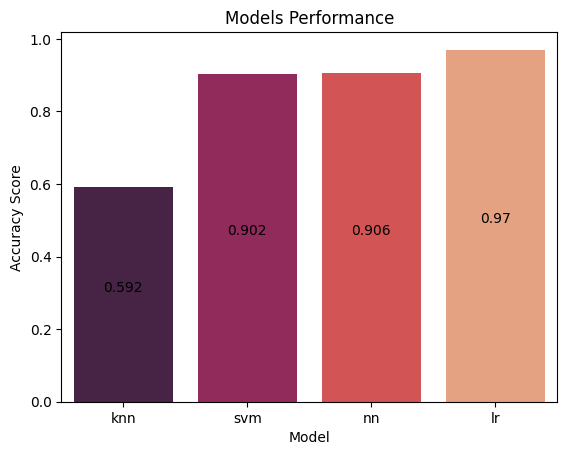

In [23]:
import matplotlib.pyplot as plt

sorted_results = dict(sorted(results.items(),key=lambda x:x[1]))

keys = list(sorted_results.keys())
values = list(sorted_results.values())

ax = sns.barplot(x=keys, y=values,palette="rocket")

for h, v in enumerate(values):
    ax.text(h, v/2, str(v), ha='center', va='bottom', fontsize=10)

plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Models Performance')

plt.show()

## Model Tuning for the Top 2 models
- nn
- lr

#### Things to take note:
1. outliers
2. features selection
    - Correlation 
    - Select K-best
    - Feature importance
    - PCA
3. GridSearchCV